In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity
0,0.469787,0.468856,0.430894,0.526252,0.354336,0.826291,0.438369,0.413444,0.502074,0.407253,0.806803,0.777430
1,0.840983,0.825336,0.802368,0.881691,0.839675,0.550517,0.799152,0.791706,0.870265,0.603052,0.457739,0.906110
2,0.000000,0.000000,0.000000,0.356308,0.468931,0.944337,0.000000,0.318730,0.306543,0.347722,0.879434,0.528958
3,0.437979,0.424094,0.369721,0.525940,0.658391,0.958849,0.381560,0.772699,0.475418,0.000000,1.000000,0.777430
4,0.452373,0.438771,0.394151,0.529852,0.753354,0.958849,0.397240,0.705401,0.502074,0.279326,0.934966,0.737635
...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.684198,0.701152,0.626742,0.760524,0.559527,0.483924,0.630337,0.820954,0.730689,0.435417,0.766277,0.442444
320,0.912846,0.950494,0.895037,0.912514,0.630601,0.130783,0.916771,0.665402,0.972933,0.687616,0.301425,0.082267
321,0.666462,0.689706,0.695703,0.619390,0.642770,0.447870,0.681837,0.639129,0.607425,0.684938,0.305213,0.808276
322,0.742408,0.732743,0.689514,0.811312,0.453762,0.667304,0.675136,0.532490,0.789473,0.497946,0.660443,0.662481


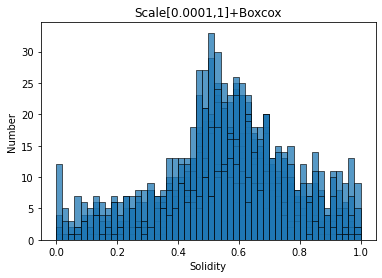

In [7]:
data_dir = Path(r'C:\Users\Firefly\Desktop\MRes_231\new_criteria')
ms_active = pd.read_csv(Path(data_dir, 'imagej_active.csv'))
ms_active = ms_active.iloc[:,1:]
ms_active = ms_active[(ms_active['expt'] == 'standard') & (ms_active['video']!= 'n')]
ms_active.index = np.arange(ms_active.shape[0])
ms_active

f = ms_active.iloc[:,3:-1]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb = pd.DataFrame(fb)
for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=ms_active.columns[3:-1]

for i in range(fb.shape[1]):
    sns.histplot(fb.iloc[:,i],bins=50)
    #fig = plt.figure()
    #res = stats.probplot(feature.iloc[:,i], plot=plt)
    plt.title('Scale[0.0001,1]+Boxcox')
    plt.ylabel('Number')
    plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    #plt.show()
mb = fb
mb

In [10]:
fb = pd.read_csv(Path(data_dir, 'fb with label.csv'))
label = fb.Type
fb = fb.iloc[:,2:]
fb

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,0.538834,0.810138,0.554070,0.720330,0.344969,0.623604,0.592566,0.313309,0.578158,0.878890,...,0.549803,0.615856,0.684709,0.509340,0.498702,0.662525,0.550857,0.555618,0.505895,0.500179
1,0.279380,0.338859,0.761658,0.895969,0.601422,0.552882,0.329477,0.590477,0.415601,0.893246,...,0.513811,0.679206,0.710956,0.718485,0.629858,0.589676,0.971046,0.598287,0.299072,0.329964
2,0.669875,0.578784,0.726639,0.363723,0.680775,0.594546,0.583714,0.605891,0.608226,0.553128,...,0.339658,0.619195,0.311913,0.374788,0.441854,0.407326,0.550857,0.642619,0.353211,0.455048
3,0.810761,0.842350,0.494039,0.704261,0.605222,0.382579,0.514583,0.635303,0.683443,0.854432,...,0.545371,0.611523,0.518258,0.636777,0.523927,0.434205,0.550857,0.555618,0.540524,0.446636
4,0.840823,0.782909,0.485931,0.568084,0.263827,0.490769,0.188911,0.586981,0.551340,0.846828,...,0.628510,0.491507,0.412681,0.638296,0.523927,0.632292,0.841293,0.302935,0.540524,0.231957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.438447,0.987175,0.525043,0.480139,0.666971,0.455913,0.546479,0.653980,0.465814,0.870673,...,0.504900,0.525777,0.416702,0.619943,0.523927,0.519136,0.550857,0.598287,0.487084,0.458316
320,0.752699,0.676283,0.684052,0.437829,0.435980,0.741725,0.625873,0.522917,0.327257,0.854432,...,0.508686,0.558259,0.434660,0.584786,0.648151,0.548427,0.971046,0.598287,0.445573,0.521342
321,0.403576,0.538612,0.567945,0.513493,0.575630,0.682494,0.736432,0.536908,0.599134,0.876863,...,0.456961,0.597650,0.435627,0.482990,0.523927,0.572603,0.507469,0.736296,0.564355,0.555305
322,0.575215,0.398247,0.532471,0.582549,0.636921,0.594673,0.582736,0.516773,0.132796,0.553128,...,0.486632,0.676515,0.414144,0.509864,0.730095,0.419150,0.550857,0.736296,0.514900,0.449778


In [11]:
X = mb
y = fb
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

NameError: name 'rng' is not defined